## 2.4.3 확률적 경사 하강법(Gradient Descent)

In [1]:
# 물리학에서 영감을 얻은 모멘텀
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient  = get_current_parameters()
    velocity = momentum * past_velocity - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

NameError: name 'loss' is not defined

In [2]:
# 다시보는 앞선 코드
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

NameError: name 'network' is not defined

# 3.1 신경망의 구조

1. 네트워크(또는 모델)를 구성하는 층
2. 입력 데이터와 그에 상응하는 타깃
3. 학습에 사용할 피드백 신호를 정의하는 손실 함수
4. 학습 진행 방식을 결정하는 옵티마이저

## 3.1.1 층 : 딥러닝의 구성 단위

완전 연결층(fully connected layer), 밀집층(dense layer), 밀집 연결 층(densely connected layer)  
3D 텐서로 저장된 시퀀스 데이터는 보통 LSTM과 같은 순환 층(recurrent layer)에 의해 처리  
4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층(convolution layer)에 의해 처리  

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# 같은 모델을 함수형 API를 사용하여 만들어 보면,
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32,activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [22]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

In [23]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## 3.4.1 IMDB 데이터셋

In [78]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [79]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [80]:
train_labels[0]

1

In [81]:
max([max(sequence) for sequence in train_data])

9999

In [82]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [83]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [84]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [85]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [86]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [87]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [88]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [89]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
# 옵티마이저 직접 설정하기
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [91]:
# 손실과 측정을 함수 객체로 지정하기
from tensorflow import keras

model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
             loss=keras.losses.binary_crossentropy,
             metrics=[keras.metrics.binary_accuracy])

## 3.4.4 훈련 검증

In [92]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [93]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5993 - acc: 0.7172 - val_loss: 0.5023 - val_acc: 0.8626
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3953 - acc: 0.8914 - val_loss: 0.3546 - val_acc: 0.8798
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2770 - acc: 0.9154 - val_loss: 0.2987 - val_acc: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2134 - acc: 0.9324 - val_loss: 0.2795 - val_acc: 0.8915
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1743 - acc: 0.9435 - val_loss: 0.2989 - val_acc: 0.8799
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1452 - acc: 0.9549 - val_loss: 0.3081 - val_acc: 0.8773
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1219 - acc: 0.9629 - val_loss: 0.2880 - val_acc: 0.8877
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1050 - a

In [52]:
history_dict = history.history

In [53]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

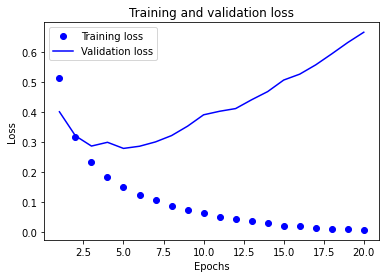

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

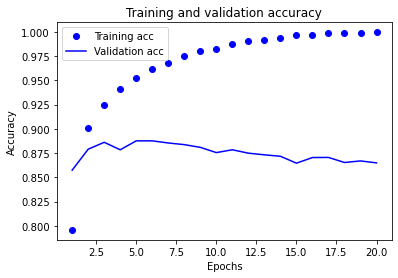

In [55]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
rersults = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4968 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2854 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2092 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 1s 703us/step - loss: 0.3008 - accuracy: 0.8829


## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [59]:
model.predict(x_test)

array([[0.12545499],
       [0.99763656],
       [0.5513122 ],
       ...,
       [0.05897111],
       [0.04297864],
       [0.5485426 ]], dtype=float32)

# 3.5 뉴스 기사 분류: 다중 분류 문제

## 3.5.1 로이터 데이터셋

In [113]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [114]:
len(train_data)

8982

In [115]:
len(test_data)

2246

## 3.5.2 데이터 준비

In [116]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [117]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [118]:
print(one_hot_train_labels.shape)

(8982, 46)


In [100]:
# 이미 내장되어 있는 케라스 함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [119]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [120]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## 3.5.4 훈련 검증

In [121]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [122]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.6948 - accuracy: 0.5297 - val_loss: 1.8031 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4866 - accuracy: 0.7013 - val_loss: 1.3440 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0936 - accuracy: 0.7675 - val_loss: 1.1725 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8725 - accuracy: 0.8146 - val_loss: 1.0644 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7113 - accuracy: 0.8510 - val_loss: 1.0049 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5778 - accuracy: 0.8800 - val_loss: 0.9694 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4725 - accuracy: 0.9022 - val_loss: 0.9500 - val_accuracy: 0.7990
Epoch 8/20
16

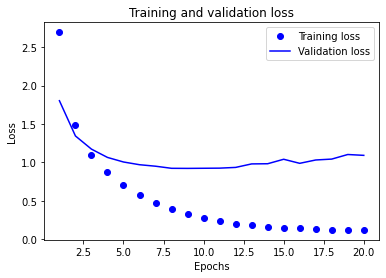

In [123]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

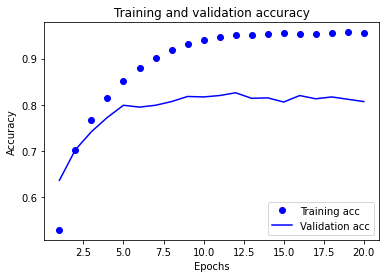

In [127]:
plt.clf() # 그래프를 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [131]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 2.6673 - accuracy: 0.4748 - val_loss: 1.7962 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4733 - accuracy: 0.6962 - val_loss: 1.3644 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.1073 - accuracy: 0.7666 - val_loss: 1.1749 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8811 - accuracy: 0.8160 - val_loss: 1.0814 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7027 - accuracy: 0.8535 - val_loss: 0.9829 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5552 - accuracy: 0.8849 - val_loss: 0.9316 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4470 - accuracy: 0.9087 - val_loss: 0.9828 - val_accuracy: 0.7850
Epoch 8/9
16/16 [===

In [132]:
results

[1.0114753246307373, 0.7822796106338501]

## 3.5.5 새로운 데이터에 대해 예측하기

In [133]:
predictions = model.predict(x_test)

In [135]:
predictions[0].shape

(46,)

In [136]:
np.sum(predictions[0])

1.0000001

In [137]:
np.argmax(predictions[0])

3

In [138]:
print(predictions[0][3])

0.87323684


## 3.5.6 레이블과 손실을 다루는 다른 방법

In [139]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [140]:
# 이 방식을 사용하려면 손실 함수 하나만 바꾸면 된다.
# 앞서 사용된 손실 함수 categorical_crossentropy는 레이블이 범주형 인코딩되어 있을 것이라고 기대함
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['acc'])

## 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [141]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [142]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.8983 - accuracy: 0.3320 - val_loss: 2.0740 - val_accuracy: 0.4570
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.6262 - accuracy: 0.6312 - val_loss: 1.4848 - val_accuracy: 0.6540
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2741 - accuracy: 0.6833 - val_loss: 1.3485 - val_accuracy: 0.6680
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1138 - accuracy: 0.7091 - val_loss: 1.2951 - val_accuracy: 0.6930
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9981 - accuracy: 0.7393 - val_loss: 1.2605 - val_accuracy: 0.6930
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9049 - accuracy: 0.7687 - val_loss: 1.2539 - val_accuracy: 0.7120
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8295 - accuracy: 0.7904 - val_loss: 1.2567 - val_accuracy: 0.7130
Epoch 8/20
63/63 [=

# 3.6 주택 가격 예측: 회귀 문제

## 3.6.1 보스턴 주택 가격 데이터셋

In [164]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [145]:
train_data.shape

(404, 13)

In [146]:
test_data.shape

(102, 13)

## 3.6.2 데이터 준비

In [165]:
# 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다.
# 이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것
# 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해서 특성의 평균을 빼고 표준 편차로 나눕니다.
# 특성의 중앙이 0 근처에 맞추어지고 표준 편차가 1이 됩니다.
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 3.6.3 모델 구성

In [174]:
# 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법
from keras import models
from keras import layers
from keras import metrics

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

## 3.6.4 K-겹 검증을 사용한 훈련 검증

In [175]:
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1)*num_val_samples:]],
    axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0) # verbose=0 이므로 훈련 과정이 출력되지 않습니다.
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [152]:
all_scores

[2.106335401535034, 2.465151071548462, 2.397310733795166, 2.6179704666137695]

In [153]:
np.mean(all_scores)

2.396691918373108

In [171]:
# epoch 500으로
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1)*num_val_samples:]],
    axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0) # verbose=0 이므로 훈련 과정이 출력되지 않습니다.
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    print(history.history)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

처리중인 폴드 # 0
{'loss': [2.694836378097534, 1.4865634441375732, 1.0936354398727417, 0.8724771738052368, 0.7112612128257751, 0.5777839422225952, 0.4725383520126343, 0.38905417919158936, 0.3212583661079407, 0.2734772264957428, 0.23348677158355713, 0.20165151357650757, 0.17826040089130402, 0.1601671427488327, 0.15016469359397888, 0.14081710577011108, 0.13124853372573853, 0.12348923087120056, 0.12386985123157501, 0.12018920481204987], 'accuracy': [0.5296918153762817, 0.7013279795646667, 0.7674767971038818, 0.8145828247070312, 0.8510398268699646, 0.8799799680709839, 0.9021548628807068, 0.9189426302909851, 0.9303432703018188, 0.9398646950721741, 0.9473816156387329, 0.9502630829811096, 0.9503883719444275, 0.9531445503234863, 0.9545226693153381, 0.9531445503234863, 0.9540215730667114, 0.9556502103805542, 0.9567777514457703, 0.9551491141319275], 'val_loss': [1.8031227588653564, 1.3439809083938599, 1.1724711656570435, 1.0643813610076904, 1.0049277544021606, 0.9694129228591919, 0.9499655961990356, 0

KeyError: 'val_mae'

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균(exponential moving average)으로 대체
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 그래프를 보게되면 검증 MAE가 80번째 에포크 이후에 줄어드는 것을 멈추었다. 이 지점 이후로는 과대적합이 시작된다.
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

# 4.2 머신 러닝 모델 평가

## 4.2.1 훈련, 검증, 테스트 세트

In [177]:
# 단순 홀드아웃 검증
num_validation_samples = 10000

np.random.shuffle(data) # 데이터를 섞는 것(셔플링)이 일반적으로 좋습니다.

validation_data = data[:num_validation_samples] # 검증 세트를 만듭니다.
data = data[num_validation_samples:]

training_data = data[:] # 훈련 세트를 만듭니다.

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data) # 훈련 세트에서 모델을 훈련하고 검증 세트로 평가합니다.

# 여기에서 모델을 튜닝하고,
# 다시 훈련하고, 평가하고, 또 다시 튜닝하고...

model = get_model()
model.train(np.concatenate([training_data, validation_data]))
# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한
# 모든 데이터를 사용하여 모델을 다시 훈련시킵니다.
test_score = model.evaluate(test_data)

NameError: name 'data' is not defined

In [178]:
# K-겹 교차 검증 구현
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validtaion_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples*(fold+1)]
    training_data = data[:num_validation_samples] * data[fold:num_validation_samples*(fold+1):]
    
    model = get_model() # 훈련되지 않은 새로운 모델을 만듭니다.
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_score.append(validation_score)
    
    validation_score = np.average(validation_scores) # 검증 점수 : K개 폴드의 검증 점수 평균
    
    model = get_model()
    model.train(data)
    test_score = model.evaluate(test_data) # 테스트 데이터를 제외한 전체 데이터로 최종 모델을 훈련합니다.    

NameError: name 'data' is not defined

In [179]:
## 셔플링을 사용한 반복 K-겹 교차 검증 : 이 방법은 비교적 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용합니다.

In [180]:
# 누락된 값 다루기
# 일반적으로 신경망에서 0이 사전에 정의된 의미 있는 값이 아니라면 누락된 값을 0으로 입력해도 괜찮습니다.

## 4.3.2 특성 공학

: 다행히 최근 딥러닝은 대부분 특성 공학이 필요하지 않습니다. 신경망이 자동으로 원본 데이터에서 유용한 특성을 추출할 수 있기 때문입니다. 그렇다면 심층 신경망을 사용할 때는 특성 공학에 대해 신경 쓰지 않아도 될까요? 두 가지 이유로 그렇지 않습니다.

1. 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있습니다. 예를 들어 시계 바늘을 읽는 문제에 합성곱 신경망을 사용하는 것은 어울리지 않습니다.

2. 좋은 특성은 더 적은 데이터로 문제를 풀 수 있습니다. 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터가 많을 때 발휘됩니다. 샘플의 개수가 적다면 특성에 있는 정보가 매우 중요해집니다.

# 4.4 과대적합과 과소적합

: 모델이 관련성이 없고 좋지 못한 패턴을 훈련 데이터에서 학습하지 못하도록 하려면 가장 좋은 방법은 더 많은 훈련 데이터를 모으는 것입니다.

: 네트워크가 적은 수의 패턴만 기억할 수 있다면 최적화 과정에서 가장 중요한 패턴에 집중하게 될 것입니다. 이런 패턴은 더 나은 일반화 성능을 제공할 수 있습니다. 이런 식으로 과대적합을 피하는 처리 과정을 규제(regularization)라고 합니다.

## 4.4.1 네트워크 크기 축소

: 너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 합니다.

In [185]:
# 기본 네트워크
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [186]:
# 작은 네트워크
model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [188]:
# 큰 네트워크
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 4.4.2 가중치 규제 추가

: 오캄의 면도날(Occam's razor) 이론, 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론

1. L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가됩니다(가중치의 L1 노름(norm))
2. L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됩니다(가중치의 L2 노름(norm)). L2 규제는 신경망에서 `가중치 감쇠(weight decay)`라고도 부릅니다.

In [189]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [190]:
from keras import regularizers

regularizers.l1(0.001) # L1 규제
regularizers.l1_l2(l1=0.001, l2=0.001) # L1과 L2 규제 병행

## 4.4.3 드롭아웃 추가

: 드롭아웃(dropout)은 토론토 대학의 제프리 힌튼과 그의 학생들이 개발했습니다.

In [191]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

: 2개의 가설이 있다는 것을 기억하세요.
1. 주어진 입력으로 출력을 예측할 수 있다고 가설을 세웁니다.
2. 가용한 데이터에 입력과 출력 사이의 관계를 학습하는 데 충분한 정보가 있다고 가설을 세웁니다.

일이 잘 진행된다고 가정하면 첫 번째 모델을 만들기 위해 세 가지 중요한 선택을 해야 합니다.
1. 마지막 층의 활성화 함수 : 네트워크의 출력에 필요한 제한을 가합니다. 예를 들어 IMDB 분류 예는 마지막 층에 시그모이드 함수를 사용합니다. 회귀 예에서는 마지막 층에 활성화 함수를 사용하지 않습니다.
2. 손실 함수 : 풀려고 하는 문제의 종류에 적합해야 합니다. 예를 들어 IMDB 예제는 binary_corssntropy를 사용하고, 회귀 예제는 mse를 사용하는 식입니다.
3. 최적화 설정 : 어떤 옵티마이저를 사용하나요? 학습률은 얼마인가요? 대부분의 경우 rmsprop과 기본 학습률을 사용하는 것이 무난합니다.

### 모델의 맞는 마지막 층의 활성화 함수와 손실 함수 선택
1. 이진분류 - 시그모이드 - binary_crossentropy
2. 단일 레이블 다중 분류 - 소프트맥스 - categorical_crossentropy
3. 다중 레이블 다중 분류 - 시그모이드 - binary_crossentropy
4. 임의 값에 대한 회귀 - 없음 - mse
5. 0과 1 사이 값에 대한 회귀 - 시그모이드 - mse 또는 binary_crossentropy

1. 다중 클래스 분류(Multi-class classification) : 다중 클래스 분류 (Multi-class single-label classification)

In [192]:
# 두 개 이상의 클래스를 가진 분류 작업
# 오렌지, 사과 또는 배
# 중복 선택 불가 -> [1,0,0] 가능, [1,1,0] 불가

2. 다중 라벨 분류(Multi-label classification) : 다중 클래스 다중 라벨 분류 (Multi-class multi-label classification)

In [193]:
# 상호 배타적이지 않은 속성을 예측
# 중복 선택 가능한 분류 -> [1 1 0] 가능
# 신문 기사 분류: 야구 선수 - 연예인 결혼 -> 스포츠/연애
# 스 연 정
#[1 1 0]
#[1 0 1]